In [56]:
import numpy as np
from path import Path
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import sys
sys.path.append('../')
import random
from tool.data_io import get_data_paths,read_image, read_json, save_image, try_create_dir,save_json
from tool.yaml_io import write_to_yaml,read_from_yaml
from tool.plt_utils import plt_samples

In [57]:
import random

from PIL import Image
from torchvision import transforms
import numpy
import torch
import copy
import numpy as np
import sys
import cv2
from path import Path
sys.path.append('../')

from transforms.transform import *
from tool.data_io import read_image, save_image
from tool.yaml_io import namespace_to_dict

In [58]:
def set_labels(label_file):
    labels = read_json(label_file)
    label_ids = set()
    label_names = set()
    for species in labels.keys():
        for (idx, item) in labels[species].items():
            label_ids.add(item['number'])
            label_names.add(item['label'])
    return labels

  0%|          | 0/28 [00:00<?, ?it/s]

qb hole
quercus-bicolor-herbivory/00000611_999045


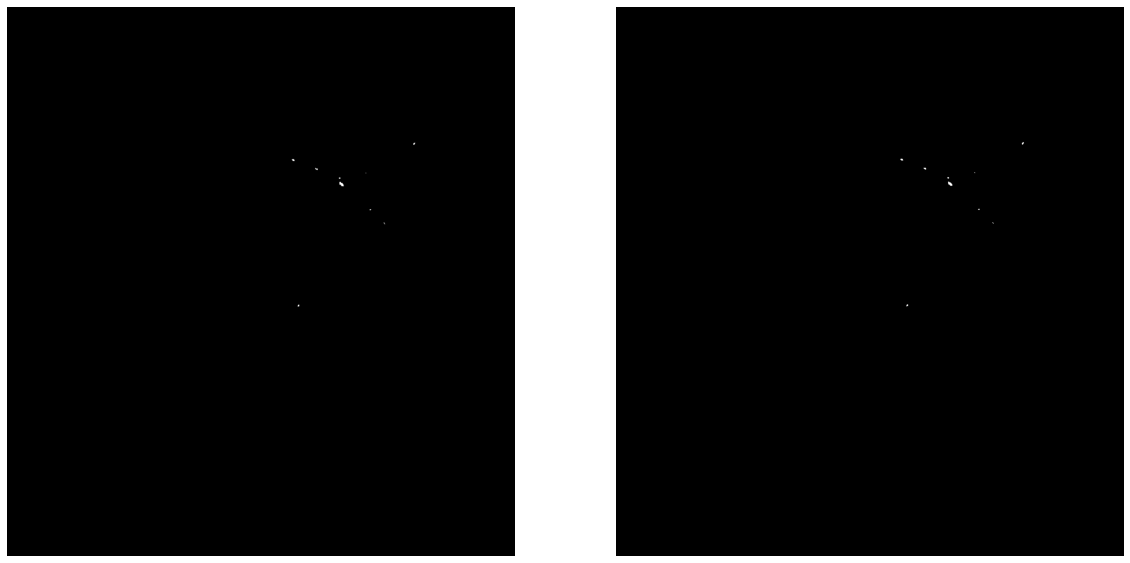

  0%|          | 0/98 [00:00<?, ?it/s]

qb hole
quercus-bicolor-herbivory/00000467_4585361


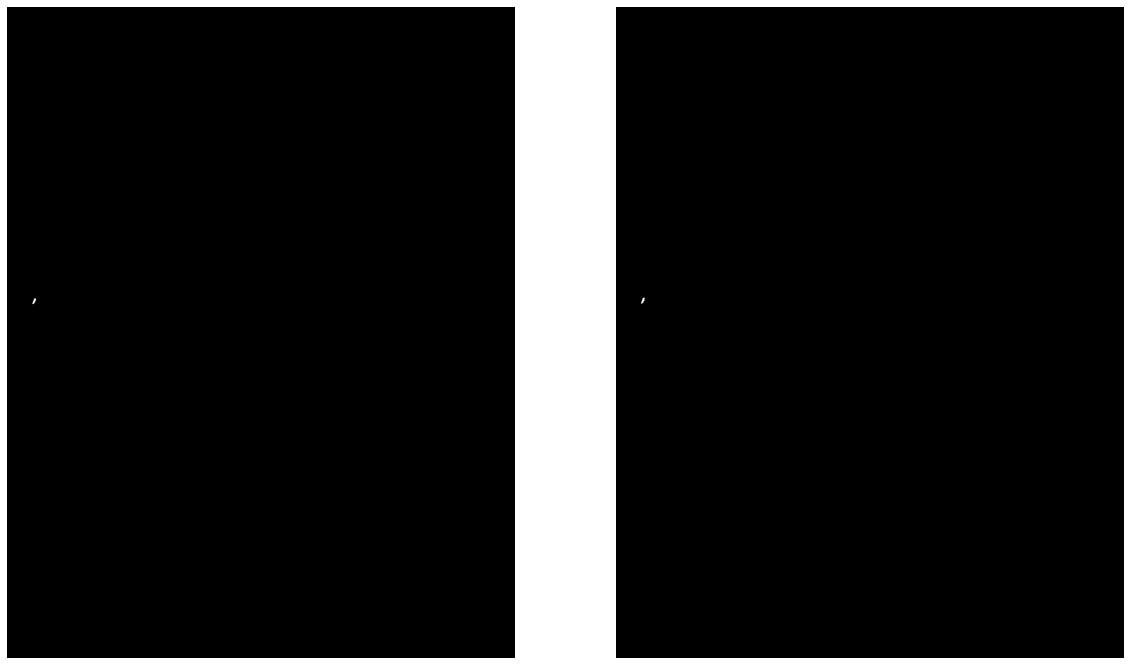

  0%|          | 0/98 [00:01<?, ?it/s]


In [55]:
phases = ['validation', 'testing']
dtypes = ['hole'] #,'skel','hole'
species_types = ['qb'] #'qb', 'os', 
r = Resize()
iter_ = 1
i = 0
for phase in phases:
    for d_type in dtypes:
        for species_type in species_types:
            print(species_type, d_type)
            data_type = f'{species_type}_{d_type}' #'ep300_ql_sk' #f'e{epoch}_al05' #f'e{epoch}_s1r95p05_mask', 'ep1_a001_b11_beta2_mar01'
            partition = read_json(f'../../stats/partition_{species_type}_{d_type}.json')  #'../../stats/partition_os_hole.json'
            root_leaves = Path('/usr/xtmp/xs75/leaves/datasets/leaves')
            root_acts = Path('/usr/xtmp/xs75/leaves/datasets/acts/image')
            labels_map = set_labels(f'../../stats/label_{d_type}.json' )# ../../stats/label_file_common_binary.json' ../../stats/label_skel.json
            root=root_acts
            id2paths = partition[phase]['images']

        
            for path in tqdm(glob(root/phase/f'*/{data_type}/*.npy')):
                id_ = os.path.join(path.split('/')[-3:][0], (path.split('/')[-4:][-1]).split('.')[0] )
                if id_ not in id2paths.keys(): 
                    continue
                print(id_)
                label, pl_label = read_image(root_leaves/id2paths[id_]['label'])
                image,_ = read_image(root_leaves/id2paths[id_]['image'])
                img_cp = image.copy()
                
                species,name = id_.split('/')
                for key, value in labels_map[species].items():
                    label[label == int(key)] = value['number']
                label_cp = label.copy()
                m,n, c = image.shape
                leaf_mask, _ = read_image(root_leaves/id2paths[id_]['leaf_mask'])
                
#                 plt_samples([image,label,leaf_mask], 1,3,figsize=(20,30),cmap='gray')
                r = Resize(1024,1024)
                imgs = {'i':image, 'l':label}
                imgs_r = r(imgs)
                r = Resize(m,n)
                imgs_r = r(imgs_r)
#                 print(imgs_r['i'].astype(np.uint8))

                plt_samples([imgs_r['l'],label_cp], 1,2,figsize=(20,30),cmap='gray')
                plt.show()
                break
#                 i+=1
            break

In [62]:
from datasets.get_dataset import *
from datasets.leaf_dataset import *
from torch.utils.data import DataLoader
import sys

sys.path.append('../')
from datasets.get_dataset import get_dataset
from losses.get_loss import get_loss
from models.get_model import get_model

path = '../../configs/visualize_img.yml'
cfg = read_from_yaml(path)
train_set, valid_set = get_dataset(cfg)

# t = cfg.training
# val_loader = DataLoader(valid_set, batch_size=1, shuffle=False, num_workers=t.hardware.workers,
#                         pin_memory=True, drop_last=False) # t.size.batch_size

# train_loader = DataLoader(train_set, batch_size=1, shuffle=True,
#                           num_workers=t.hardware.workers,
#                           pin_memory=True) #t.size.batch_size

# for i_step, batch in enumerate(train_loader):
#     print(batch['image'].shape)
#     print(batch['label'].shape)
#     print(batch['leaf_mask'].shape)

  loaded 219 out of (219) images from /usr/xtmp/xs75/leaves/datasets/leaves;
  label_names: ['__background__', 'hole'];



TypeError: unhashable type: 'list'

In [6]:
for i in range(1):
    batch = train_set._load_sample(i)
    batch = r(batch)
    print(batch['image'].shape)
    print(batch['label'].shape)
    print(batch['leaf_mask'].shape)

(1024, 1024, 3)
(1024, 1024, 1)
(1024, 1024, 1)


In [7]:
batch.keys()

dict_keys(['idx', 'id', 'image', 'label', 'leaf_mask'])

In [8]:
r(image.astype(np.uint8)).shape

(1024, 1024, 1)

In [9]:
image.dtype

dtype('float64')